# Машинное обучение, DS-поток
## Задание ML.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 60 баллов;
* Задача 2 &mdash; 60 баллов;
* Задача 3 &mdash; 120 баллов.

In [ ]:
# Bot check

# HW_ID: ds_ml3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

*Если у вас новая версия `sklearn` и импорт `load_boston` в ячейке ниже выдает ошибку, скачайте этот датасет так, как написано в тексте ошибки, или же воспользуйтесь альтернативным более объемным датасетом `fetch_california_housing`.*

In [26]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing  # см. комментарий выше

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

# подавляем предупреждения об устаревании при использовании многоклассовой логистической регрессии
import warnings
warnings.simplefilter('ignore')

**При возникновении затруднений, которые не получается решить самостоятельно за разумное время, спрашивайте вопросы в чате. Вам обязательно постараются помочь. Успехов с решением!**

---
### Задача 1

Рассмотрим датасет для классификации вина на три класса по 13 вещественным признакам. Датасет состоит из 178 объектов. В данной задаче, используя этот датасет, вы научитесь пользоваться кросс-валидацией и подбирать оптимальные гиперпараметры модели.

In [4]:
print(load_wine()['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

Загрузим сами данные

In [5]:
X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

**1.** Используя одну из стратегий кросс-валидации подберите оптимальные параметры обучения решающего дерева &mdash; `max_depth` (от 1 до 14) и `min_samples_split`, а также оптимальный критерий (достаточно рассмотреть критерий Джини и энтропийный). В качестве метрик используйте Accuracy и F1 с микро и макро усреднением. В данной задаче можно пользоваться готовой реализацией дерева.

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier,\
                         DecisionTreeRegressor,\
                         export_graphviz
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

tree_gridsearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'max_depth': np.arange(1, 15), 
        'min_samples_split': [2, 3, 5, 10, 15, 20, 25, 50, 100],
        'criterion': ['gini', 'entropy']
    }
)

tree_gridsearch.fit(X_train, y_train)

print('Параметры:', tree_gridsearch.best_params_)
print('Accuracy:', accuracy_score(y_test, tree_gridsearch.predict(X_test)))
print('F1 micro:', f1_score(y_test, tree_gridsearch.predict(X_test), average='micro'))
print('F1 macro:', f1_score(y_test, tree_gridsearch.predict(X_test), average='macro'))

Параметры: {'criterion': 'gini', 'max_depth': np.int64(3), 'min_samples_split': 3}
Accuracy: 0.9555555555555556
F1 micro: 0.9555555555555556
F1 macro: 0.9564691338541257


Постройте графики зависимости метрик от максимальной глубины дерева для каждого критерия на train и на test. Значение `min_samples_split` фиксируйте.

In [44]:
def get_accuracy_f1(model_class, param_name, grid, fixed_params={}):
    '''
    Функция для оценки точности классификации 
    для заданных значений параметра param_name
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра
    '''
        
    acc, f1_micro, f1_macro = [], [], []
    
    for param_value in grid:
        estimator = model_class(**(fixed_params | {param_name: param_value}))
        estimator.fit(X_train, y_train)
        acc.append(accuracy_score(y_test, estimator.predict(X_test)))
        f1_micro.append(f1_score(y_test, estimator.predict(X_test), average='micro'))
        f1_macro.append(f1_score(y_test, estimator.predict(X_test), average='macro'))
    return acc, f1_micro, f1_macro


def plot_dependence(model_class, param_name, grid=range(2, 20), title='', fixed_params={}):
    '''
    Функция для отображения графика зависимости accuracy 
    от значения параметра c названием param_name
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра,
    3) title - заголовок графика
    '''
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(12, 6))

    acc, f1_micro, f1_macro = get_accuracy_f1(model_class, param_name=param_name, grid=grid, fixed_params=fixed_params)

    plt.plot(grid, acc, label='Accuracy', lw=3)
    plt.plot(grid, f1_micro, label='F1 micro', lw=3)
    plt.plot(grid, f1_macro, label='F1 macro', lw=3)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('Значение метрики')
    plt.title(title, fontsize=20)
    sns.set_style('whitegrid')

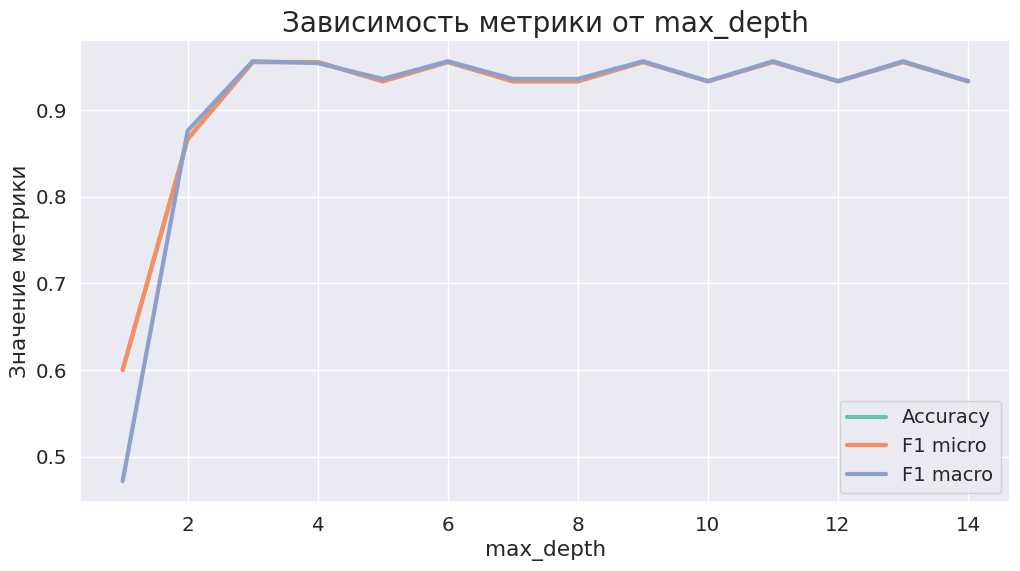

In [45]:
plot_dependence(
    DecisionTreeClassifier,
    'max_depth', range(1, 15),
    title='Зависимость метрики от max_depth',
    fixed_params={'min_samples_split': 3, 'criterion': 'gini'}
)
plt.show()

**2.** Подберите коэффициент регуляризации для логистической регрессии и постройте аналогичные графики. Какая из двух моделей лучше?

In [46]:
from sklearn.linear_model import LogisticRegression

logreg = GridSearchCV(
    estimator=LogisticRegression(multi_class='ovr', random_state=42, penalty='l2', max_iter=5000),
    param_grid={
        'C': np.logspace(-4, 5, 100)
    }
).fit(X_train, y_train)
logreg.best_params_

{'C': np.float64(0.1873817422860385)}

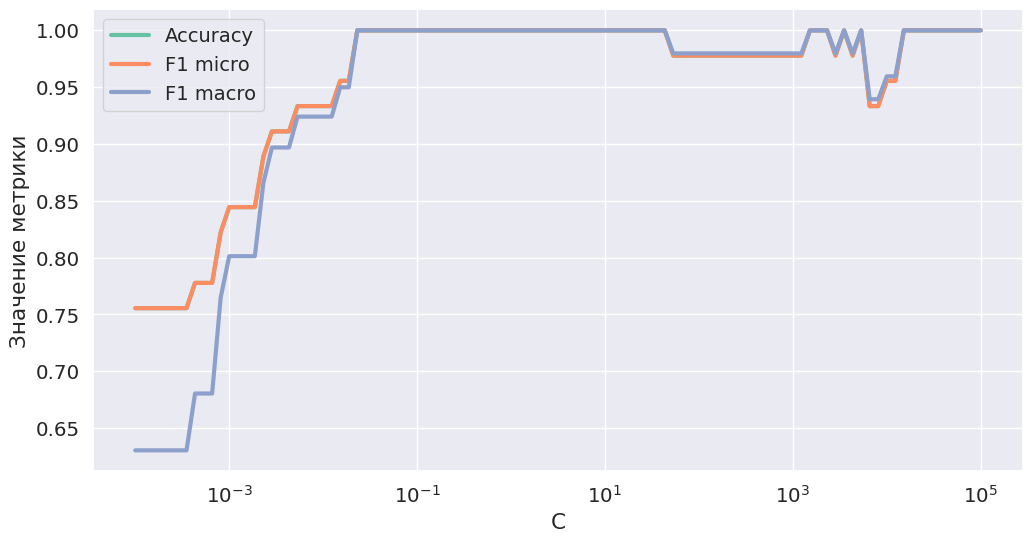

In [47]:
plot_dependence(LogisticRegression, param_name='C', grid=np.logspace(-4, 5, 100), fixed_params={'multi_class': 'ovr', 'penalty': 'l2', 'max_iter': 5000})
plt.xscale('log')
plt.show()

Лучшие результаты в данной задаче по всем метриками даёт всё же логистическая регрессия с $C\approx 0.187$

**3.** Предположим, что мы не различаем классы 1 и 2. Объедините эти два класса и посмотрите на полученное соотношение классов.

In [50]:
y_union = y
y_union[y == 2] = 1
print('Доля класса 1:', np.mean(y_union))

Доля класса 1: 0.6685393258426966


Подберите параметры с помощью кросс-валидации для лучшего типа модели (логистическая регрессия, решающее дерево) из первой части задачи. В рамках кросс-валидации посчитайте также метрики Precision и Recall. Как изменились оптимальные параметры?

Лучшее значение C: 3.5111917342151346


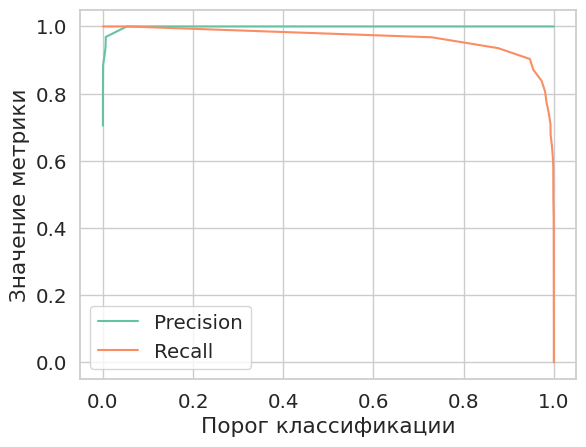

In [56]:
from sklearn.metrics import precision_recall_curve

Xu_train, Xu_test, yu_train, yu_test = train_test_split(X, y_union)

logreg = GridSearchCV(
    estimator=LogisticRegression(multi_class='ovr', random_state=42, penalty='l2', max_iter=5000),
    param_grid={
        'C': np.logspace(-4, 5, 100)
    }
).fit(Xu_train, yu_train)

print('Лучшее значение C:', logreg.best_params_['C'])
precision, recall, thresholds = precision_recall_curve(yu_test, logreg.predict_proba(Xu_test)[:, 1])
plt.plot(thresholds, precision[1:], label='Precision')
plt.plot(thresholds, recall[1:], label='Recall')
plt.xlabel('Порог классификации')
plt.ylabel('Значение метрики')
plt.legend()
plt.show()

Постройти графики ROC и PR кривых для модели с подобранными гиперпараметрами. Какой вывод можно сделать?

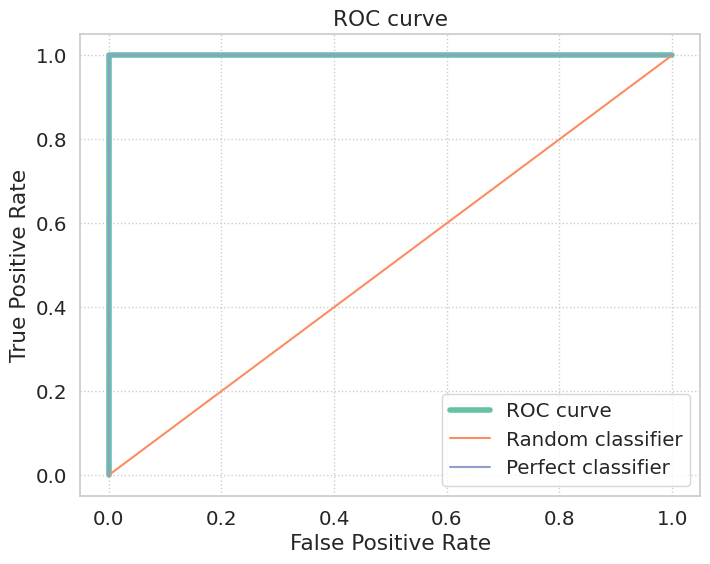

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(yu_test, logreg.predict_proba(Xu_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=4, label='ROC curve')
plt.plot([0, 1], [0, 1], label='Random classifier')
plt.plot([0, 0.001, 1], [0, 1, 1], label='Perfect classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(ls=":")
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Выберите два порога, посчитайте для них метрики бинарной классификации и придумайте по одной ситутации, где один порог лучше другого.

Выберем порог $0.05$ из графика и порог $0.23$ из доли класса 1.

In [63]:
from sklearn.metrics import precision_score, recall_score

prediction = [
    (logreg.predict_proba(Xu_test)[:, 1] >= 0.05).astype(int),
    (logreg.predict_proba(Xu_test)[:, 1] >= 0.23).astype(int)
]
df = pd.DataFrame([
    {
        'Accuracy': accuracy_score(yu_test, prediction[0]),
        'F1': f1_score(yu_test, prediction[0]),
        'Precision': precision_score(yu_test, prediction[0]),
        'Recall': recall_score(yu_test, prediction[0])
    },
    {
        'Accuracy': accuracy_score(yu_test, prediction[1]),
        'F1': f1_score(yu_test, prediction[1]),
        'Precision': precision_score(yu_test, prediction[1]),
        'Recall': recall_score(yu_test, prediction[1])
    },
], index=[0.05, 0.23])
df.index.name = 'Порог'
df

,Accuracy,F1,Precision,Recall
Порог,,,,
0.05,0.977778,0.984127,0.96875,1.0
0.23,1.000000,1.000000,1.00000,1.0


В данной задаче оказывается, что порог $0.23$ при использовании логистической регрессии даёт наилучший результат, определяя класс практически безошибочно. 

---
### Задача 2

Рассмотрим модель с наилучшими гиперпараметрами из предыдущей задачи для бинарной классификации. Исследуем свойства различных подходов валидации. В качестве метрики используйте F1-метрику.

Выполните не менее 100 следующих итераций.
1. Перемешайте исходные данные.
2. Выполните подход с однократным разбиением:
    * разделите перемешанные даннные на обучающую и валидационную выборку,
    * обучите модель на обучающей выборке,
    * посчитайте качество модели на валидационной выборке и сохраните это значение.
3. Выполните KFold-валидацию:
    * примените KFold к перемешанным даннным, выполняя разбиение на 5 фолдов,
    * посчитайте среднее и дисперсию качества моделей по фолдам и сохраните эти значение.
4. Аналогично примените ShuffleSplit-валидацию, выполнив 5 ее итераций. На каждой итерации размер валидационной части должен совпадать с тем, который был использован в KFold. Иначе говоря, нужно использовать `ShuffleSplit(n_splits=5, test_size=0.2)`.
5. Повторите пункты 2-4 для стратифицированных разбиений.

*Проверьте, что на разных итерациях у вас получаются разные значения метрик. Если одинаковые, то может быть где-то нужно отключить `random_state`. Также советуем при отладке кода делать запуски на малое количество итераций.*

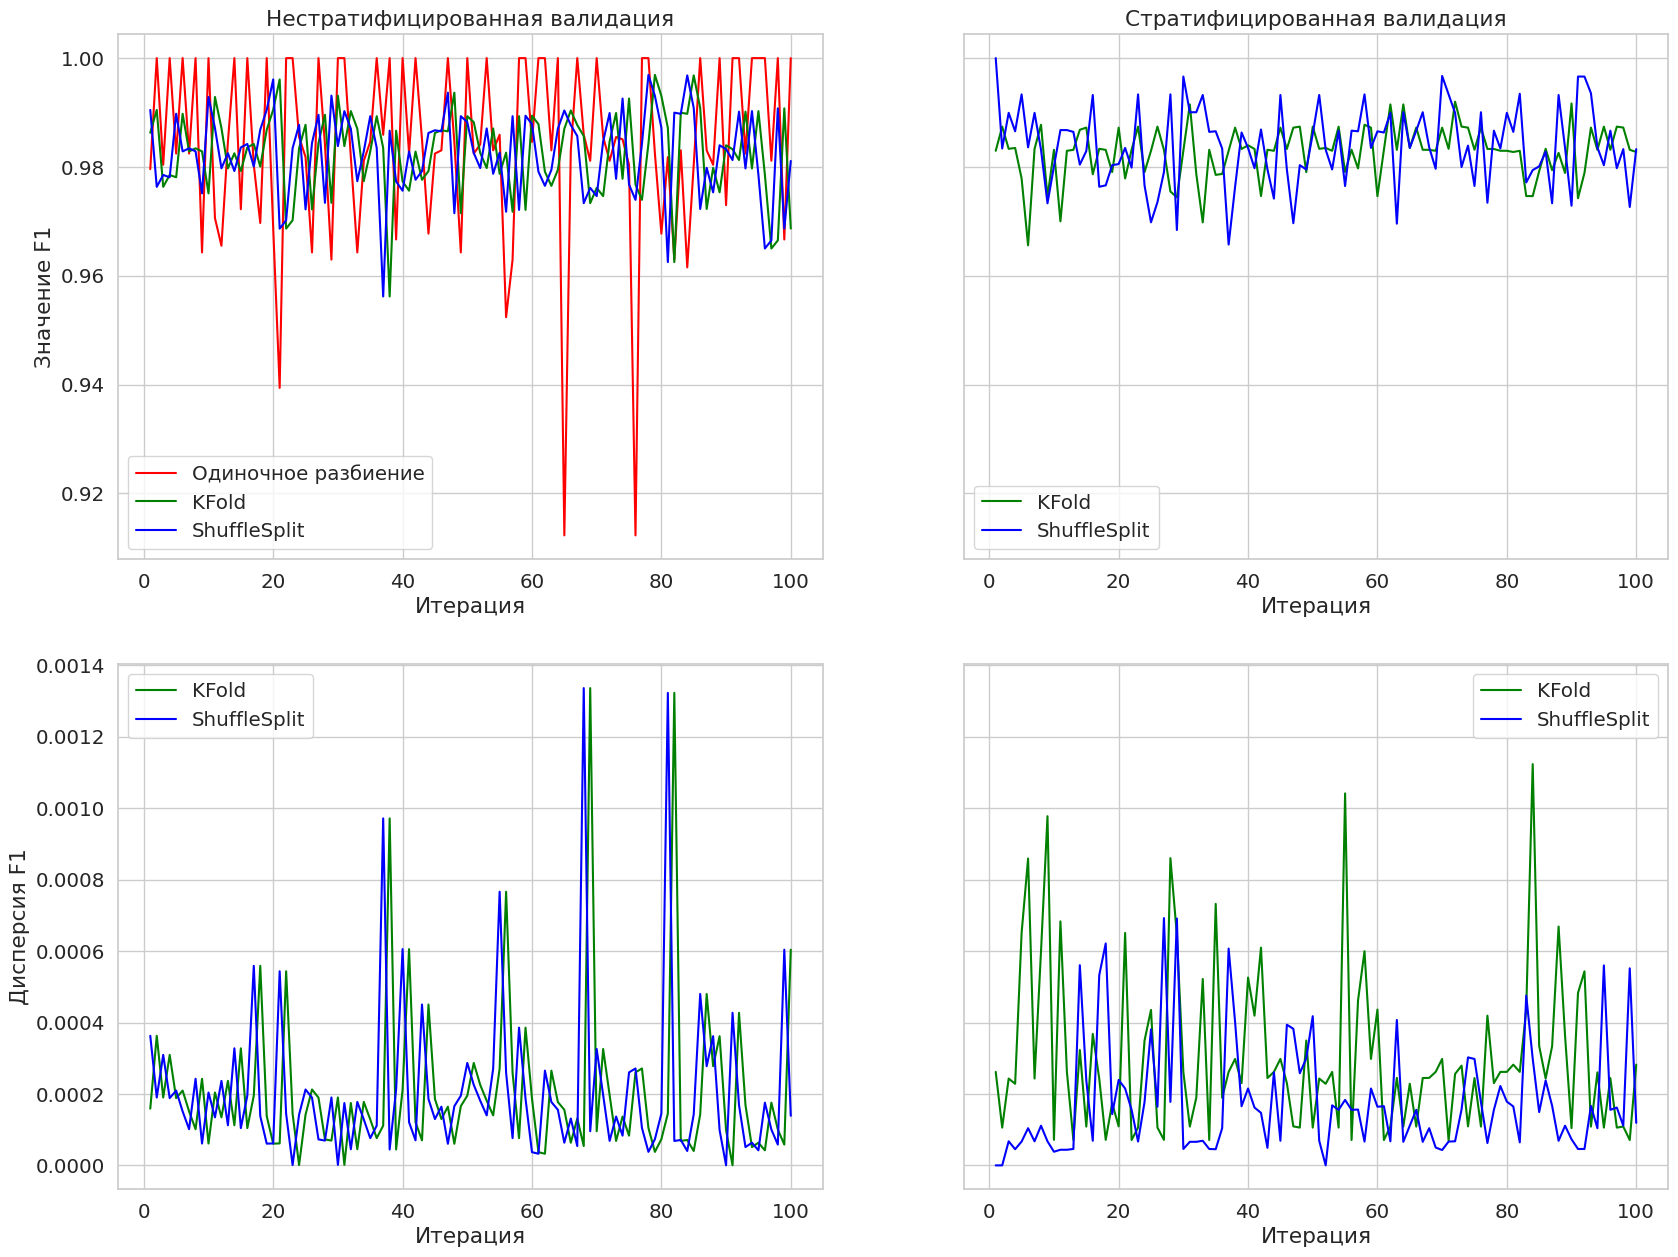

In [84]:
from sklearn.model_selection import train_test_split,\
                                    LeaveOneOut,\
                                    LeavePOut,\
                                    KFold,\
                                    ShuffleSplit,\
                                    GridSearchCV,\
                                    StratifiedKFold,\
                                    StratifiedShuffleSplit,\
                                    LeaveOneGroupOut,\
                                    LeavePGroupsOut,\
                                    GroupKFold,\
                                    GroupShuffleSplit,\
                                    cross_val_score


holdout_f1 = []
kfold_f1 = []
kfold_f1_disp = []
ssplit_f1 = []
ssplit_f1_disp = []
strat_kfold_f1 = []
strat_kfold_f1_disp = []
strat_ssplit_f1 = []
strat_ssplit_f1_disp = []

model = LogisticRegression(C=logreg.best_params_['C'], max_iter=5000)

kf = KFold(n_splits=5, shuffle=True)
ss = ShuffleSplit(
    # количество итераций перемешивания с разбиением на train и test
    n_splits=5,
    # доля объектов, которые хотим класть в test на каждой итерации
    test_size=0.25
)
skf = StratifiedKFold(n_splits=5, shuffle=True)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25)

for _ in range(100):
    # однократное разбиение
    Xu_train, Xu_valid, yu_train, yu_valid = train_test_split(X, y_union)
    model.fit(Xu_train, yu_train)
    holdout_f1.append(f1_score(yu_valid, model.predict(Xu_valid)))

    # KFold
    kf_scores = []
    for train_index, valid_index in kf.split(X):
        model.fit(X[train_index], y_union[train_index])
        kf_scores.append(f1_score(y_union[valid_index], model.predict(X[valid_index])))
    kfold_f1.append(np.mean(ss_scores))
    kfold_f1_disp.append(np.var(ss_scores))

    # ShuffleSplit
    ss_scores = []
    for train_index, valid_index in ss.split(X):
        model.fit(X[train_index], y_union[train_index])
        ss_scores.append(f1_score(y_union[valid_index], model.predict(X[valid_index])))
    ss_scores = np.array(ss_scores)
    ssplit_f1.append(np.mean(ss_scores))
    ssplit_f1_disp.append(np.var(ss_scores))

    #Стратифицированный KFold
    strat_kfold_scores = []
    for train_index, valid_index in skf.split(X, y_union):
        model.fit(X[train_index], y_union[train_index])
        strat_kfold_scores.append(f1_score(y_union[valid_index], model.predict(X[valid_index])))
    strat_kfold_f1.append(np.mean(strat_kfold_scores))
    strat_kfold_f1_disp.append(np.var(strat_kfold_scores))

    # Стратифицированный ShuffleSplit
    strat_ssplit_scores = []
    for train_index, valid_index in sss.split(X, y_union):
        model.fit(X[train_index], y_union[train_index])
        strat_ssplit_scores.append(f1_score(y_union[valid_index], model.predict(X[valid_index])))
    strat_ssplit_f1.append(np.mean(strat_ssplit_scores))
    strat_ssplit_f1_disp.append(np.var(strat_ssplit_scores))

fig, ax = plt.subplots(2, 2, sharey='row', figsize=(20, 15))
it = range(1, 101)

ax[0, 0].plot(it, holdout_f1, label='Одиночное разбиение', color='red')
ax[0, 0].plot(it, kfold_f1, label='KFold', color='green')
ax[0, 0].plot(it, ssplit_f1, label='ShuffleSplit', color='blue')
ax[0, 0].set_ylabel('Значение F1')
ax[0, 0].set_xlabel('Итерация')
ax[0, 0].set_title('Нестратифицированная валидация')
ax[0, 0].legend()

ax[1, 0].plot(it, kfold_f1_disp, label='KFold', color='green')
ax[1, 0].plot(it, ssplit_f1_disp, label='ShuffleSplit', color='blue')
ax[1, 0].set_ylabel('Дисперсия F1')
ax[1, 0].set_xlabel('Итерация')
ax[1, 0].legend()

ax[0, 1].plot(it, strat_kfold_f1, label='KFold', color='green')
ax[0, 1].plot(it, strat_ssplit_f1, label='ShuffleSplit', color='blue')
ax[0, 1].set_xlabel('Итерация')
ax[0, 1].set_title('Стратифицированная валидация')
ax[0, 1].legend()

ax[1, 1].plot(it, strat_kfold_f1_disp, label='KFold', color='green')
ax[1, 1].plot(it, strat_ssplit_f1_disp, label='ShuffleSplit', color='blue')
ax[1, 1].set_xlabel('Итерация')
ax[1, 1].legend()

plt.show()

По всем итерациям посчитайте
* выборочную дисперсию среднего качества моделей для каждого из трех подходов, тем самым оценив разброс значений метрик в каждом подходе;
* постройте kde-график среднего качества моделей;
* для подходов KFold и ShuffleSplit посчитайте выборочное среднее дисперсии качества моделей по фолдам, тем самым оценив разброс метрик между фолдами/итерациями.

In [87]:
print('== Выборочная дисперсия ==')
print('Одиночное разбиение:', 100 / 99 * np.var(holdout_f1))
print('KFold:', 100 / 99 * np.var(kfold_f1))
print('ShuffleSplit:', 100 / 99 * np.var(ssplit_f1))

print()
print('== Средняя дисперсия ==')
print('KFold:', np.mean(kfold_f1_disp))
print('ShuffleSplit:', np.mean(ssplit_f1_disp))

== Выборочная дисперсия ==
Одиночное разбиение: 0.0002919811979179083
KFold: 6.117057962131262e-05
ShuffleSplit: 6.103830549160781e-05

== Средняя дисперсия ==
KFold: 0.00021156026191283063
ShuffleSplit: 0.00021135998371032302


Сделайте выводы о свойствах подходов, их преимуществах и недостатках.

---
### Задача 3

Каждый студент DS-потока должен написать свое дерево. Что ж, время пришло...

*Советы.*
* Для отладки кода советуем строить простые деревья глубины 1-3 на простых датасетах по 10-20 объектах, печатать обучаемые параметры и т.д.. Если все хорошо работает, в финальном решении убирайте отладочный вывод.
* Сравните качество реализованного дерева с качеством реализации из sklearn. Ровно такое же качество вы можете не получить из-за различных небольших оптимизаций, но если качество отличается на порядок, стоит проверить свою реализацию.
* Сначала лучше разобраться с одной задачей (регрессией или классификацией), а затем переходить к другой.

Вспомним, как именно происходит построение решающего дерева. Для построения дерева в каждой нелистовой вершине происходит разбиение подвыборки на две части по некоторому признаку $x_j$. Этот признак и порог $t$, по которому будет происходить разбиение, мы хотим брать не произвольно, а основываясь на соображениях оптимальности.  Для этого нам необходимо знать некоторый фукционал качества, который будем оптимизировать при построении разбиения. 

Обозначим через $X_m$ — множество объектов, попавших в вершину $m$, разбиваемую на данном шаге, а через $X_\ell$ и $X_r$ — объекты, попадающие в левое и правое поддерево соответственно при заданном правиле $I\{x_j < t\}$. Пусть также $H$ — используемый критерий информативности (impurity criterion).

Выпишите функционал, который необходимо минимизировать при разбиении вершины:

**Ответ:** $Q(X_m, j, t)=\frac{|X_l|}{|X_m|}H(X_l)+\frac{|X_r|}{|X_m|}H(X_r)$

**Реализация критериев информативности.**


Вспомните еще раз, на какой общей идее основаны критерии информативности и какую характеристику выборки они стремятся оптимизировать?

**Ответ:** критерий информативности показывает, насколько хорошо предсказываются константой целевые переменные.


Перед тем, как непосредственно работать с решающими деревьями, реализуйте функции подсчёта значения критериев разбиения вершин решающих деревьев. Использовать готовые реализации критериев или классов для решающих деревьев из `sklearn` и из других библиотек **запрещено.** Также при реализации критериев по причине неэффективности **запрещается использовать циклы**. Воспользуйтесь библиотекой `numpy`.

Каждая функция принимает на вход одномерный `numpy` — массив размерности `(n,)` из значений отклика.

In [90]:
# Код функций, реализующих критерии разбиения. 

def mean_square_criterion(y):
    ''' Критерий для квадратичной функции потерь. '''
    
    return np.var(y)


def mean_abs_criterion(y):
    ''' Критерий для абсолютной функции потерь. '''
    
    return np.mean(np.abs(y - np.median(y)))


def get_probs_by_y(y):
    ''' Возвращает вектор частот для каждого класса выборки. '''

    _, counts = np.unique(y, return_counts=True)
    return counts / len(y)


def gini_criterion(y):
    ''' Критерий Джини. '''
    
    p = get_probs_by_y(y)
    return np.sum(p * (1 - p))


def entropy_criterion(y):
    ''' Энтропийный критерий. '''
    
    p = get_probs_by_y(y)
    return -np.sum(p * np.log(p))

Протестируйте реализованные функции.

Тесты для распределения вероятностей на классах.

In [91]:
assert np.allclose(get_probs_by_y([1, 1, 2, 2, 7]), np.array([0.4, 0.4, 0.2]))
assert np.allclose(get_probs_by_y([1]), np.array([1]))

Тесты для критериев разбиения.

In [92]:
assert np.allclose(entropy_criterion([25]), 0)
assert np.allclose(gini_criterion([25]), 0)
assert np.allclose(mean_square_criterion([10, 10, 10]), 0)
assert np.allclose(mean_abs_criterion([10, 10, 10]), 0)

**Реализация класса решающего дерева.**

Для того, чтобы лучше понять, как устроены решающие деревья и как именно устроен процесс их построения, вам предлагается реализавать класс `BaseDecisionTree`, реализующий базовые функции решающего дерева.  Большая часть кода уже написана. 

Используются следующие классы:

**Класс** `BaseDecisionTree` — класс для решающего дерева, в котором реализовано построение дерева. Все вершины дерева хранятся в списке `self.nodes`, при этом вершина с номером 0 — корень.


* `__init__` — инициализация дерева. Здесь сохраняются гиперпараметры дерева: `criterion`, `max_depth`, `min_samples_split` и инициализируется список вершин, состоящий только из одной вершины — корневой,
* `build_` — рекурсивная функция построения дерева. В ней при посещении каждой вершины дерева проверяются условия, стоит ли продолжать разбивать эту вершину. Если да, то перебираются все возможные признаки и пороговые значения и выбирается та пара (признак, значение), которой соответствует наименьшее значение критерия информативности,
* `fit` — функция обучения дерева, принимающая на вход обучающую выборку. В этой функции происходит предподсчёт всех возможных пороговых значений для каждого из признаков, а затем вызывается функция `build_`.

**Класс** `Node` — класс вершины дерева. Внутри вершины, помимо раздяляющего признака и порога хранятся `self.left_son`, `self.right_son` — номера дочерних вершин, а также `self.left_prob` и `self.right_prob` — вероятности попадания элемента в каждую из них. При этом в листовых вершиных хранятся также `self.y_values` — значения соответствующих элементов выборки, попавших в вершину.

* `__init__` — инициализация вершины. Принимает в качестве аргументов разделяющий признак и пороговое значение и сохраняет их.

**Класс** `DecisionTreeRegressor` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи регрессии.

* `predict_instance` — получение предсказания для одного элемента выборки. Выполняется посредством спуска по решающему дереву до листовой вершины,

* `predict` — получение предсказаний для всех элементов выборки.


**Класс** `DecisionTreeClassifier` — наследник класса `BaseDecisionTree`, в котором реализованы функции для предсказаний при решении задачи классификации.
* `predict_proba_instance` — предсказание распределения вероятностей по классам для одного элемента выборки, 
* `predict_proba` — предсказание распределения вероятностей по классам для всех элементов выборки,
* `predict` — предсказание меток классов для всех элементов выборки.

Перед написанием кода разбиения дерева, ответьте на вопрос, какие пороговые значения для каждого из признаков вы будете перебирать. Почему рассматривать другие значения в качестве пороговых не имеет смысла?

**Ответ:** Перебирать имеет смысл лишь значения признака, имеющиеся в датасете. Действительно, "промежуточное" значение признака даст разбиение, совпадающее с разбиением по ближайшему большему значению признака из датасета, и таким образом их рассматривать не требуется.

**Структура решающего дерева**


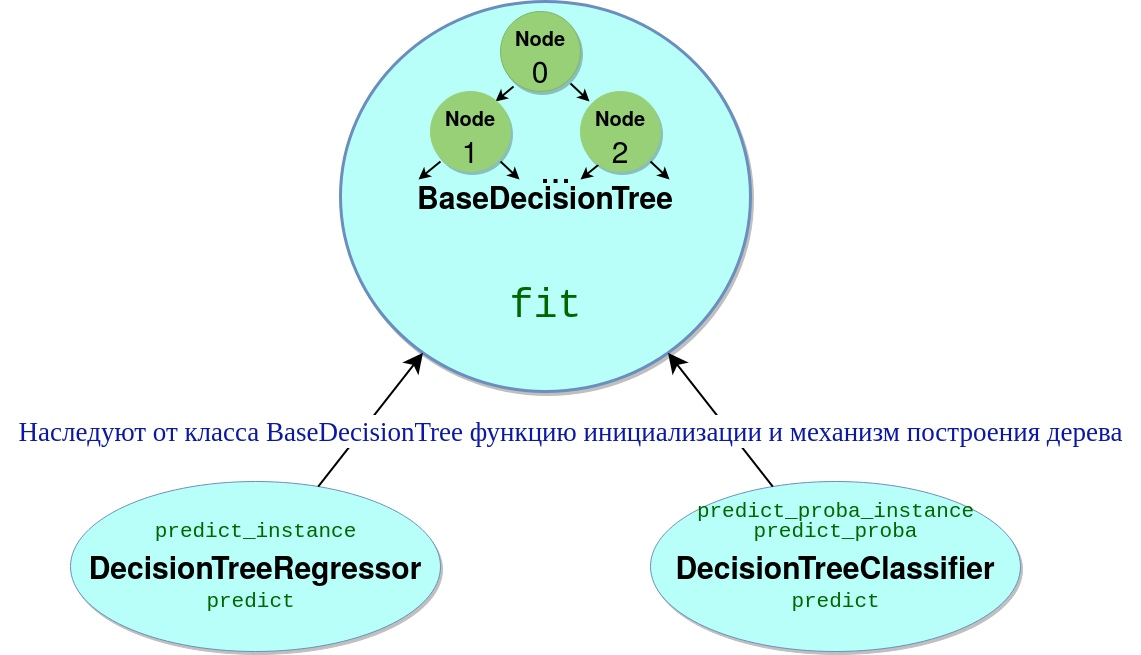

In [136]:
def get_not_nans(arr):
    '''
    Функция, которая создаёт и возвращает новый массив 
    из всех элементов переданного массива, не являющихся None.
    '''
    
    return arr.copy()[~np.isnan(arr)]


class Node(object):
    def __init__(self, split_feature=None, split_threshold=None):
        '''
        Функция инициализации вершины решающего дерева.
        
        Параметры.
        1) split_feature — номер разделяющего признака
        2) split_threshold — пороговое значение
        '''
        
        self.split_feature = split_feature
        self.split_threshold = split_threshold

        # По умолчанию считаем, что у вершины нет дочерних вершин.
        self.left_son, self.right_son = None, None

        # Вероятности попадания в каждую из дочерних вершин нужно поддерживать 
        # для корректной обработки данных с пропусками
        self.left_prob, self.right_prob = 0, 0

        # Массив значений y. Определён только для листовых вершин дерева
        self.y_values = None
        

class BaseDecisionTree(BaseEstimator):
    '''
    Здесь содержится реализация всех основных функций для работы
    с решающим деревом.
    
    Наследование от класса BaseEstimator нужно для того, чтобы 
    в дальнейшем данный   класс можно было использовать в 
    различных функциях библиотеки sklearn, например, в функциях 
    для кросс-валидации.
    '''
    
    def __init__(self, criterion, max_depth=np.inf, min_samples_split=2):
        '''
        Функция инициализации решающего дерева.
        
        Параметры.
        1) criterion — критерий информативности, 
        2) max_depth — максимальная глубина дерева,
        3) min_samples_split — минимальное количество элементов 
        обучающей выборки,  которое должно попасть в вершину, 
        чтобы потом происходило разбиение этой вершины.
        '''
        
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

        # Список всех вершин дерева. В самом начале 
        # работы алгоритма есть только одна 
        # вершина — корень.
        self.nodes = [Node()]

        # Количество классов. Актуально только 
        # при решении задачи классификации.
        self.class_count = 1

        # Сюда нужно будет записать все значения 
        # для каждого из признаков датасета
        # (они будут нашими порогами).
        self.feature_values = None
    
    def build_(self, v, X, y, depth=0):
        '''
        Рекурсивная функция построения решающего дерева.
        
        Параметры.
        1) v — номер рассматриваемой вершины
        2) X, y — обучающая выборка, попавшая в текущую вершину
        3) depth — глубина вершины с номером v
        '''

        if depth == self.max_depth or len(y) < self.min_samples_split:
            # Еcли строим дерево для классификации, то 
            # сохраняем метки классов всех элементов выборки,
            # попавших в вершину.
            if callable(getattr(self, 'set_class_count', None)):
                self.nodes[v].y_values = y.copy()

            # Для регрессии сразу вычислим среднее всех 
            # элементов вершины.
            else:
                self.nodes[v].y_values = np.mean(y)
            return
        
        best_criterion_value = np.inf
        best_feature, best_threshold = 0, 0
        sample_size, feature_count = X.shape
        
        # переберём все возможные признаки и значения порогов,
        # найдём оптимальный признак и значение порога 
        # и запишем их в best_feature, best_threshold
        for feature_id in range(feature_count):
            for threshold in self.feature_values[feature_id]:
                X_m = X[:, feature_id]
                X_l = X_m[X_m < threshold]
                X_r = X_m[X_m >= threshold]
                criterion_value = len(X_l) / len(X_m) * self.criterion(X_l) + len(X_r) / len(X_m) * self.criterion(X_r)
                if criterion_value < best_criterion_value:
                    best_criterion_value = criterion_value
                    best_feature, best_threshold = feature_id, threshold
            
        # сохраним найденные параметры в класс текущей вершины
        self.nodes[v].split_feature = best_feature
        self.nodes[v].split_threshold = best_threshold
        # разделим выборку на 2 части по порогу
        X_m = X[:, best_feature]
        X_l = X[X_m < best_threshold]
        X_r = X[X_m >= best_threshold]
        y_l = y[X_m < best_threshold]
        y_r = y[X_m >= best_threshold]
        
        # создаём левую и правую дочерние вершины,
        # и кладём их в массив self.nodes 
        self.nodes.append(Node())
        self.nodes.append(Node())
        
        # сохраняем индексы созданных вершин в качестве 
        # левого и правого сына вершины v
        self.nodes[v].left_son, self.nodes[v].right_son =\
            len(self.nodes)-2, len(self.nodes)-1

        # рекурсивно строим дерево для дочерних вершин
        self.build_(self.nodes[v].left_son, X_l, y_l, depth+1)
        self.build_(self.nodes[v].right_son, X_r, y_r, depth+1)
    
    def fit(self, X, y):
        '''
        Функция, из которой запускается построение 
        решающего дерева по обучающей выборке.
        
        Параметры.
        X, y — обучающая выборка
        '''
        
        # сохраним заранее все пороги для каждого из 
        # признаков обучающей выборки
        X, y = np.array(X), np.array(y)
        self.feature_values = []
        for feature_id in range(X.shape[1]):
            self.feature_values.append(
                np.unique(get_not_nans(X[:, feature_id]))
            )
            
        set_class_count = getattr(self, 'set_class_count', None)

        # если строится дерево для классификации, 
        # то нужно посчитать количество классов 
        if callable(set_class_count):
            set_class_count(y)
        self.build_(0, X, y)

Теперь, когда общий код решающего дерева написан, нужно сделать обёртки над `BaseDecisionTree` — классы `DecisionTreeRegressor` и `DecisionTreeClassifier` для использования решающего дерева в задачах регрессии и классификации соответственно.

Допишите функции `predict_instance` и `predict_proba_instance` в классах для регрессии и классификации соответственно. В этих функциях нужно для одного элемента $x$ выборки промоделировать спуск в решающем дереве, а затем по листовой вершине, в которой окажется объект, посчитать для классификации — распределение вероятностей, а для регрессии — число $y$.

In [137]:
class DecisionTreeRegressor(BaseDecisionTree):
    def predict_instance(self, x, v):
        '''
        Рекурсивная функция, предсказывающая значение
        y для одного элемента x из выборки.
        
        Параметры.
        1) x — элемент выборки, для которого
        требуется предсказать значение y
        2) v — рассматриваемая вершина дерева
        '''
        
        # если вершина — лист, возвращаем в качестве предсказания 
        # среднее всех элементов, содержащихся в ней
        if self.nodes[v].left_son is None:
            return self.nodes[v].y_values
            
        # если у объекта x значение признака по
        # которому происходит разделение,  меньше 
        # порогового, то спускаемся в левое поддерево,
        # иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_instance(x, self.nodes[v].right_son)
            
        # а если у элемента отсутствует значение 
        # разделяющего признака,  то будем спускаться 
        # в оба поддерева
        else:
            left_predict = self.predict_instance(x, self.nodes[v].left_son)
            right_predict = self.predict_instance(x, self.nodes[v].right_son)
            return np.mean([left_predict, right_predict])
    
    def predict(self, X):
        '''
        Функция, предсказывающая значение
        y для всех элементов выборки X.
        
        Параметры.
        X — выборка, для которой требуется
        получить вектор предсказаний y
        '''
        
        return [self.predict_instance(x, 0) for x in X]

Для удобства реализации функции `predict_proba_instance` класса `DecisionTreeClassifier` будем считать, что все классы имеют целочисленные метки от 0 до $k-1$, где $k$ — количество классов. Если бы это условие не было выполнено, то нужно было бы сначала сделать предобработку меток классов в датасете.

In [106]:
class DecisionTreeClassifier(BaseDecisionTree):
    def set_class_count(self, y):
        '''
        Функция, вычисляющая количество классов 
        в обучающей выборке.
        
        Параметры.
        y — значения класса в обучающей выборке
        '''
        
        self.class_count = np.max(y) + 1
    
    def predict_proba_instance(self, x, v):
        '''
        Рекурсивная функция, предсказывающая вектор
        вероятностей принадлежности  объекта x
        к классам
        
        Параметры.
        1) x — элемент выборки, для которого 
        требуется предсказать значение y
        2) v — вершина дерева, в которой 
        находится алгоритм
        '''
        
        if self.nodes[v].left_son is None:
            # считаем долю каждого класса и возвращаем вектор вероятностей 
            return get_probs_by_y(self.nodes[v].y_values)
            
        # если у объекта x значение признака по которому
        # происходит разделение, меньше порогового, 
        # то спускаемся в левое поддерево, иначе — в правое
        if x[self.nodes[v].split_feature] < self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].left_son)
        elif x[self.nodes[v].split_feature] >= self.nodes[v].split_threshold:
            return self.predict_proba_instance(x, self.nodes[v].right_son)
            
        # а если у объекта отсутствует значение 
        # разделяющего признака, то будем спускаться 
        # в оба поддерева
        else:
            left_predict = self.predict_proba_instance(
                x, self.nodes[v].left_son)
            right_predict = self.predict_proba_instance(
                x, self.nodes[v].right_son)
            return np.mean([left_predict, right_predict], axis=0)
    
    def predict_proba(self, X):
        '''
        Функция, предсказывающая вектор вероятностей
        принадлежности объекта x к классам для 
        каждого x из X
        
        Параметры.
        X — выборка, для которой требуется получить вектор предсказаний y
        '''
        
        return [self.predict_proba_instance(x, 0) for x in X]
    
    def predict(self, X):
        '''
        Функция, предсказывающая метку класса для
        всех элементов выборки X.
        
        Параметры.
        X — выборка, для которой требуется получить
        вектор предсказаний y
        '''
        
        return np.argmax(self.predict_proba(X), axis=1)

**Подбор параметров.**

В этой части задания вам предлагается поработать с написанным решающим деревом, применив его к задачи классификации и регрессии, и в обеих задачах подобрать оптимальные параметры для построения.

Не забывайте писать выводы.

**1. Задача регрессии.**

Теперь самое время протестировать работу написанного нами решающего дерева. В качестве датасете возьмите `boston` из `sklearn`. 

In [159]:
boston_X, boston_y = fetch_california_housing(return_X_y=True)

In [160]:
# Произведём срез датасета
boston_X = boston_X[:500, :]
boston_y = boston_y[:500]

Далее для критерия `r2_score` найдите оптимальные параметры обучения дерева — `max_depth` и `min_samples_split`. Рассмотрите диапозон значений для `max_depth`: от 3 до 14.

In [129]:
from sklearn.metrics import r2_score

regression_criteria = [mean_square_criterion, mean_abs_criterion, gini_criterion, entropy_criterion]
criterion_names = ['MSE', 'MAE', 'Gini', 'Entropy']

С начала надо разбить выборку на train и test.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y)

In [162]:
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(criterion=mean_square_criterion),
    scoring='r2',
    param_grid={
        'max_depth': np.arange(3, 15),
        'min_samples_split': [2, 3, 5, 10]
    },
    n_jobs=-1
).fit(X_train, y_train)
grid.best_params_

/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shcnik42/.local/lib/python3.10/site-pa

{'max_depth': np.int64(8), 'min_samples_split': 5}

Теперь проведите кросс-валидацию для каждого из критериев разбиения вершин.

In [163]:
kf = KFold(n_splits=5)

for i, crit in enumerate(regression_criteria):
    tree = DecisionTreeRegressor(criterion=crit, max_depth=8, min_samples_split=5)
    print(criterion_names[i], ':', np.mean(cross_val_score(estimator=tree, X=X_train, y=y_train, cv=kf, scoring='r2', n_jobs=-1)))

/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shcnik42/.local/lib/python3.10/site-pa

MSE : 0.7891305007365961


/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar 

MAE : 0.7926301420505659


/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar 

Gini : 0.20784198435863938


/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar 

Entropy : 0.21879777811777937


Постройте графики зависимости `r2-score` от максимальной глубины дерева на обучающей и тестовой выборке для каждого критерия на train и на test. В качестве максимальной глубины используйте значения от 1 до 14. Значение `min_samples_split` фиксируйте.

In [165]:
scores_train = {}
scores_test = {}
for crit in criterion_names:
    scores_train[crit] = []
    scores_test[crit] = []

for depth in np.arange(1, 15):
    for i, crit in enumerate(regression_criteria):
        tree = DecisionTreeRegressor(criterion=crit, max_depth=depth, min_samples_split=3)
        tree.fit(X_train, y_train)
        scores_test[criterion_names[i]].append(r2_score(y_test, tree.predict(X_test)))
        scores_train[criterion_names[i]].append(r2_score(y_train, tree.predict(X_train)))

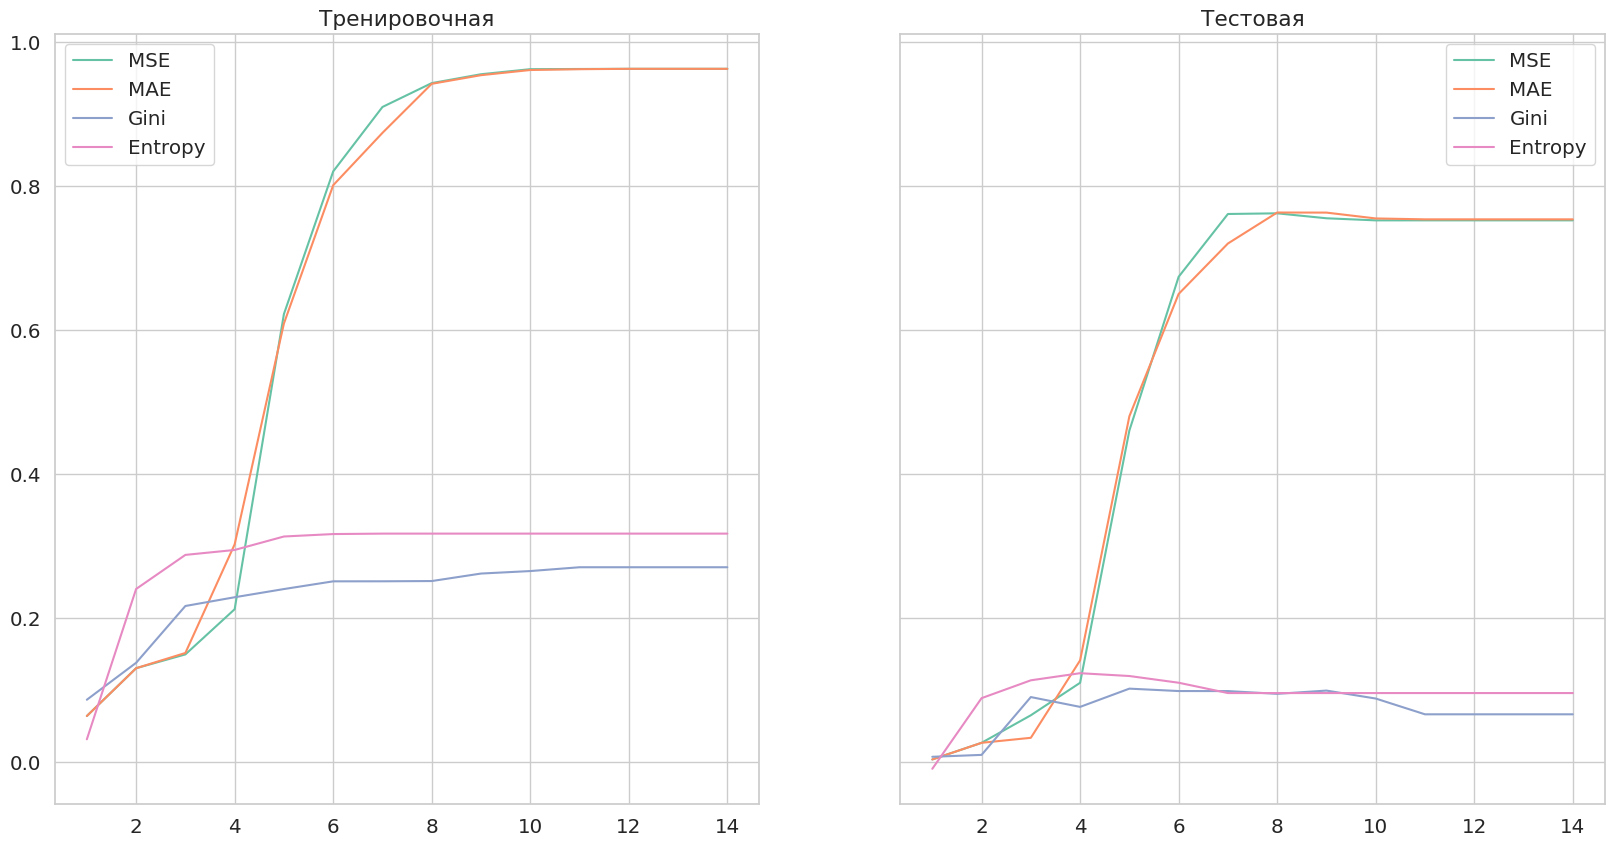

In [166]:
fig, ax = plt.subplots(1, 2, sharey='row', figsize=(20, 10))
depth_range = np.arange(1, 15)

for crit in criterion_names:
    ax[0].plot(depth_range, scores_train[crit], label=crit)
    ax[1].plot(depth_range, scores_test[crit], label=crit)

ax[0].set_title('Тренировочная')
ax[0].legend()
ax[1].set_title('Тестовая')
ax[1].legend()

plt.show()

Сделайте вывод, в котором объясните, почему графики получились такими.

Скорее всего, вы заметили, что дерево в этих экспериментах строится довольно медленно. Как можно ускорить его построение? Можно ли ускорить нахождение оптимального разбиения по некоторому вещественному признаку?

**Вывод.**

На тренировочной выборке качество по всем критериям увеличивается с глубиной деревьев. Это связано с тем, что, увеличивая глубину, мы всё точнее приближаем истинную зависимость кусочной функцией. На тестовой же выборке максимум достигается около глубины 7-8, а затем начинает несколько снижаться - это связано с тем, что начинает проявляться переобучение.

**2. Задача классификации, работа с пропусками**

В этом пункте вам предстоит освоиться с обработкой пропусков в решающих деревьях, реализованной ранее.

Рассмотрим датасет, в котором часть данных пропущена. В качестве примера возьмём датасет https://archive.ics.uci.edu/ml/datasets/Adult для определения категории дохода работников, по таким признакам, как возраст, образование, специальность, класс работы, пол, кол-во отрабатываемых часов в неделю и некоторым другим.

In [167]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education1', 'education2', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country', 'target'
]

Поскольку предсказание в дереве на данных с пропусками часто занимает сильно больше времени, чем в случае отсутствия пропусков (так как часто приходится спускаться разу в 2 поддерева), то для экономии времени сократим датасет, взяв из него только первые 10000 строк данных.

In [168]:
adult_df = pd.read_csv('adult.data', header=None)[:10000]
adult_df.columns = column_names
target = adult_df['target'] == ' >50K'
adult_df = adult_df.drop(['target'], axis=1)
adult_df.head()

,age,workclass,fnlwgt,education1,education2,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Предобработаем датасет, заменив категориальные признаки one-hot векторами.

In [169]:
adult_df = pd.get_dummies(adult_df)
adult_df.head()

,age,fnlwgt,education2,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Поскольку все пропущенные значения относились к категориальным признакам и помечались в датасете знаком `?`, то для каждого категориального признака `feature` исходного датасета надо выполнить следующую процедуру: рассмотреть признак `feature_?` нового датасета и для всех строк, для которых выполнено `feature_?=1`, значениях всех признаков с префиксом `feature` установить в `None`. 

In [170]:
all_indices = np.arange(adult_df.shape[0])

for feature in column_names:
    if f'{feature}_ ?' in adult_df.columns:
        none_indices = all_indices[adult_df[f'{feature}_ ?'] == 1]
        
        for dummy_feature in adult_df.columns:
            if not dummy_feature.startswith(f'{feature}_ '):
                continue
            if dummy_feature != f'{feature}_ ?':
                adult_df[dummy_feature][none_indices] = None
        adult_df = adult_df.drop(f'{feature}_ ?', axis=1)

Посмотрим на распределение пропущенных значений по признакам.

In [171]:
np.sum(adult_df.isnull(), axis=0)

age                                  0
fnlwgt                               0
education2                           0
capital-gain                         0
capital-loss                         0
                                  ... 
native-country_ Thailand           181
native-country_ Trinadad&Tobago    181
native-country_ United-States      181
native-country_ Vietnam            181
native-country_ Yugoslavia         181
Length: 104, dtype: int64

Разобьём данные на обучающую и тестовую выборки в отношении 3:1.

In [174]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(
    adult_df, target, random_state=777
)

При помощи кросс-валидации найдём оптимальные гиперпараметры `max_depth` и `min_samples_split` для каждого из критериев разбиения деревьев для классификации.

In [177]:
best_score = 0.0
best_depth = 0
best_split = 0

depth_scores = [0.0] * 8

for depth in np.arange(3, 11):
    for min_samples_split in [2, 3, 5]:
        tree = DecisionTreeRegressor(criterion=mean_square_criterion, max_depth=8, min_samples_split=5)
        score = np.mean(cross_val_score(estimator=tree, X=X_adult_train.astype(float), y=y_adult_train.astype(float), cv=kf, scoring='accuracy', n_jobs=-1))
        if score > best_score:
            best_score, best_depth, best_split = score, depth, min_samples_split
        if score > depth_scores[depth - 3]:
            depth_scores[depth - 3] = score

print('Best max_depth:', best_depth)
print('Best min_samples_split:', best_split)

/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/shcnik42/.local/lib/python3.10/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/shcnik42/.local/lib/python3.10/site-pa

Best max_depth: 0
Best min_samples_split: 0


/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/home/shcnik42/.local/lib/python3.10/site-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "/tmp/ipykernel_2926200/1633101022.py", line 45, in predict
  File "/tmp/ipykernel_2926200/1633101022.py", line 45, in <listcomp>
  File "/tmp/ipy

Постройте графики зависимости `accuracy` от максимальной глубины дерева на обучающей и тестовой выборке, аналогично тому как сделали в пунтке с регресиией для `r2-score`.

In [ ]:
<...>

Сделайте выводы. Почему графики получились такими? Как соотносятся оптимальные значения параметров на обучающей и на тестовой выборках?

**Вывод.**

<...>